# Lab 1: Introduction


# Part 1: Using Numpy

In [ ]:
import numpy as np # import numpy

## Creating n-dimensional numpy arrays from Python lists

In [ ]:
# Defining a numpy array 

# 1D array
arr = np.array([1,2,3,4,5]) 

# 2D array
arr_2d = np.array([[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15]])

# 3D array
arr_3d = np.array([[[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15]],
                   [[16,17,18,19,20],
                  [21,22,23,24,25],
                  [26,27,28,29,30]]])

print(arr, arr.shape) # Prints the array and its dimensions
print(arr_2d, arr_2d.shape)
print(arr_3d, arr_3d.shape)

print(type(arr))      # Numpy array has 'numpy.ndarray' type

## Creating numpy arrays from numpy commands

In [ ]:
# Define number of each dimension 

n1 = 3
n2 = 4
n3 = 5

# Zeros array
zeros_1d = np.zeros(n1)
zeros_2d = np.zeros((n1,n2)) 
zeros_3d = np.zeros((n1,n2,n3))

# Ones array
ones_1d = np.ones(n1)
ones_2d = np.ones((n1,n2))
ones_3d = np.ones((n1,n2,n3))

# Creating array using np.arange
arr_arange = np.arange(0, 10, 1)     # (start, stop, stepsize)

# Creating an array using np.linspace
arr_linspace = np.linspace(0, 9, 10) # (start, stop, # of bins)

print(zeros_2d)
print(ones_2d)
print(arr_arange)
print(arr_linspace)

In [ ]:
# Random array

np.random.seed(10)                 # Fixes the seed number so that random samplings always give same results

rand_arr = np.random.randn(n1, n2) # Random array sampled from standard normal distribution 
print(rand_arr)

## Matrix operations in Numpy

In [ ]:
# Elementwise Addition
twos_2d = np.add(ones_2d, ones_2d)
print(twos_2d)

In [ ]:
# Elementwise Subtraction
fives_2d = ones_2d * 5
print(np.subtract(fives_2d, twos_2d))
print(fives_2d - 2) #alternative method

In [ ]:
# Elementwise Multiplication
print(np.multiply(fives_2d, twos_2d))

In [ ]:
# Elementwise Division
print(np.divide(fives_2d, twos_2d))

In [ ]:
# Dot product
A = ones_2d.copy()
b = np.arange(0, 4, 1)
print(np.dot(A, b))

In [ ]:
# Elementwise Power 
print(np.power(twos_2d, 3)) #(array to be powered, power constant)

In [ ]:
# Transpose
print(ones_2d)
print(ones_2d.T)             # method 1
print(np.transpose(ones_2d)) # method 2

## Useful Numpy functions

In [ ]:
# np.concatenate

print(np.concatenate([ones_1d, zeros_1d])) # Concatenation between 1D arrays joins them into a single array

In [ ]:
# np.stack (vstack and hstack)

print(np.stack([ones_2d, twos_2d]))  # np.stack([2D, 2D]) outputs 3D array
print(np.hstack([ones_2d, twos_2d])) # np.hstack([2D, 2D]) outputs horizontally stacked 2D arrays 
print(np.vstack([ones_2d, twos_2d])) # np.vstack([2D, 2D]) outputs vertically stacked 2D arrays

In [ ]:
# np.min, np.max, np.mean, np.sum

arr = np.arange(10) # 0 to 9

print(np.min(arr))  # minimum value of the array
print(np.max(arr))  # maximum value of the array
print(np.mean(arr)) # mean value of the array
print(np.sum(arr))  # summation of all the elements

In [ ]:
# np.argmin, np.argmax, np.argsort

print(np.argmin(arr))  # Finds the index corresponding to minimum value
print(np.argmax(arr))  # Finds the index corresponding to maximum value

np.random.shuffle(arr) # Shuffles the array
print(arr)             # Shuffled array

print(np.argsort(arr)) # Sorts the array indices from the smallest to the largest value

In [ ]:
# np.where

print(np.where(arr == 7)) # Finds the specific indicies in the array that satisfies the condition
print(np.where(arr >= 7)) # Another example using inequality

# Part 2: Plotting Data

In [ ]:
#%matplotlib inline   # If using local notebook runtime, allows you to display the plot inside the jupyter notebook
#%matplotlib notebook # Alternatively, you can use this line instead for interactive plots

import matplotlib.pyplot as plt

## Basic plotting

In [ ]:
x = np.arange(0, 10, 1/32) # x axis data
y = np.sin(x)              # y axis data
plt.plot(x, y)             # plot the data

## Labeling your plots

In [ ]:
plt.plot(x, y) 
plt.title('y=sin(x)')  # set the title
plt.xlabel('x')        # set the x axis label
plt.ylabel('y')        # set the y axis label
plt.xlim(-1, 11)       # set the x axis range
plt.ylim(-2, 2)        # set the y axis range
plt.grid()             # enable the grid

## Multiple plots

In [ ]:
# Multiple Plots
# On same figure 
x = np.arange(0, 10, 1/32) # x axis data
y1 = np.sin(x)             # y axis data 1
y2 = np.cos(x)             # y axis data 2
y3 = np.tan(x)             # y axis data 3
plt.figure(1)              # create figure 1
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 11)
plt.ylim(-2, 2)
plt.suptitle('Trigonometric Functions')
plt.legend()
plt.show()


## Creating subplots

In [ ]:
# Multiple Subplots
x = np.arange(0, 10, 1/32) # x axis data
y1 = np.sin(x)             # y axis data for subplot 1
y2 = np.cos(x)             # y axis data for subplot 2
y3 = np.tan(x)             # y axis data for subplot 3

fig = plt.figure(2,figsize=(8,8)) # create figure 2

plt.subplot(311)           # (number of rows, number of columns, current plot)
plt.plot(x, y1)
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(312)
plt.plot(x, y2)
plt.title('cos(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(313)
plt.plot(x, y3)
plt.title('tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 1)

fig.tight_layout()

# Part 3: Working with data


In [ ]:
import pandas as pd
import sklearn

# Import necessary modules
from sklearn.linear_model import LogisticRegressionCV

diabetes = pd.read_csv('diabetes.csv') # Read the dataset with pandas
diabetes.head() # Display the head of the data

In [ ]:
# Scaling the data

X1 = diabetes.values[:, :-1]                                              # Extract features
Y1 = diabetes.values[:, -1]                                               # Extract labels

# Scale the data z = (x - u) / s

X1_mean = np.mean(X1, axis = 0)                                           # Compute means
X1_std = np.std(X1, axis = 0)                                             # Compute stds
X1_mean_repeated = np.tile(X1_mean, (len(X1), 1))                         # Create repeated array of mean to match X1 dimension
X1_std_repeated = np.tile(X1_std, (len(X1), 1))                           # Create repeated array of std to match X1 dimension
X1_scaled = np.divide(np.subtract(X1, X1_mean_repeated), X1_std_repeated) # Compute z for the array

In [ ]:
# Divide the data into training and testing

test_ratio = 0.3                              # Set the test data ratio
train_size = int(len(X1)*(1-test_ratio))      # Set training data size based on test ratio

X_train = X1_scaled[:train_size]              
X_test = X1_scaled[train_size:]
Y_train = Y1[:train_size]
Y_test = Y1[train_size:]

In [ ]:
# Use cross validation to train
model = LogisticRegressionCV(cv=10).fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print("Accuracy: %.2f%%" % (result*100))

# Lab Assignment: Implement Neural Network for XOR gate from scratch 


First we will set up our enviroment. We will need `pandas` and `numpy` packages for data processing and `matplotlib` to visualize the performance of the NN later on.

In [1]:
# XOR table
import pandas as pd, numpy as np, matplotlib.pyplot as plt
XOR_table = pd.read_csv('XOR_table.csv')
XOR_table

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


This XOR table will be our input to train the model. Specifically, our inputs are the `x1` and `x2` columns and the `y` column are the labels, or desired outputs. We will extract the values from the XOR table into an array and split out inputs and outputs.

![](https://drive.google.com/uc?export=view&id=1lf82hKZxfBqhV2m5cLIRO_9pO1S3T4ty)

In [2]:
XOR_values = XOR_table.values
X = XOR_values[:,0:2]
targets = XOR_values[:,-1].reshape(-1,1)

print(X)       # Input data
print(targets) # Output targets

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


Now let's implement our Neural Network. It will have one input layer, a hidden layer, and an output layer. The input and hidden layers will each have two nodes, and the output will have one, since our task is to output a binary value. 

Here we will do some setup.

In [19]:
# First set a seed for consistent results
np.random.seed(5)

# Define dimensions on input, hidden and output layers
# There are two input neurons, two in hidden layer, and one output
input_dim, hidden_dim, output_dim = 2,2,1

# Define learning rate
learning_rate=0.1

# Define a hidden layer and output layer
# We will initialize our weights randomly
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

Now let's define some functions.

In [17]:
# Define sigmoid activation function
# if deriv = True, returns the derivative instead
def sigmoid(x, deriv=False):
  if deriv:
    return x*(1-x)
  else:
    return 1/(1+np.exp(-x))

# Define loss function
# This will accept two arrays and return the L2-norm error
def loss(y,t):
  return np.sum((y-t)**2)

# Performs feed foward computations and returns the results
def forward(x, w1, w2):
  z = sigmoid(np.dot(x,w1.T))
  y = sigmoid(np.dot(z,w2))
  return z,y

# Performs back propogation to obtain gradients of loss function
def backprop(x,z,y,w1,w2,targets):
  error = 2*(y-targets)
  grad_w2 = np.dot((error*sigmoid(y, deriv=True)).T, z).T
  #grad_w2 = (np.dot(2*(y-targets).T, y).dot((1-y).T).dot(z)).T
  g1 = error*sigmoid(y,deriv=True).dot(W2.T)
  g2 = g1*sigmoid(z,deriv=True)
  grad_w1 = np.dot(g2.T, x)
  return grad_w1, grad_w2

# Training routine
# returns 
#   w1,w2: updated weights matrices
#   loss_vals: array of loss function values for each iteration
def train(x,targets,w1,w2,iter = 10000,verbose=False):
  # Define empty array to store loss function output
  loss_vals = []

  # create local copies of W1 and W2 so we don't overwrite the originals
  local_w1 = w1.copy()
  local_w2 = w2.copy()
  for i in range(iter):
    
    # Forward pass: compute predicted y
    z,y = forward(x, local_w1, local_w2)

    # Compute and print L2-norm loss
    if verbose: print(loss(y,targets))

    # Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
    grad_w1, grad_w2 = backprop(x,z,y,local_w1,local_w2,targets)

    # Update weights
    local_w1 -= learning_rate*grad_w1
    local_w2 -= learning_rate*grad_w2

    # Save loss to an array
    loss_vals.append(np.sum(loss(y,targets)))

  return local_w1,local_w2,loss_vals

# Predict based on trained weights
def predict(x, w1_pred, w2_pred):
  z,y = forward(x,w1_pred,w2_pred)
  return z,y

Now with these functions defined we may implement the NN. 

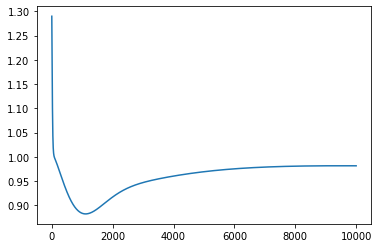

In [20]:
# Train neural net
W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

# Plot loss function over each iteration
%matplotlib inline
plt.plot(loss_vals);

We observe a high amount of error from this loss curve, so let's try adding more neurons, say 4, to our hidden layer. 

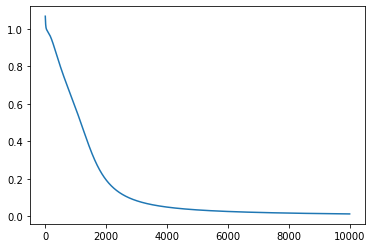

In [21]:
# Redefine hidden_dim
hidden_dim = 4

# Reinitialize weights
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

# Train neural net
W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

# Plot loss function over each iteration
%matplotlib inline
plt.plot(loss_vals);

Now our loss function converges very close to 0. 
Checking our predictions on the training data, we should see values that are very close to the actual labels.

In [36]:
# run prediction on test data
z,y = predict(X, W1_pred, W2_pred)
results = np.hstack((X,y, targets))
vars = np.array(["X1", "X2", "predicted", "actual"])
pd.DataFrame(results, columns = vars)

,X1,X2,predicted,actual
0,0.0,0.0,0.057052,0.0
1,0.0,1.0,0.945438,1.0
2,1.0,0.0,0.947519,1.0
3,1.0,1.0,0.058518,0.0


Now we would like to evaluate the model performance on a test dataset. Since we trained the model on the entire XOR table, let's try testing on a finer grid of cartesian coordinates between `[0,1]`. We can then plot the results and use a color scale to represent the predictions. Although we do not have labels to determine model accuracy, we know that, for example, that if we take a point near `[1,1]`, say `x=[0.9, 0.9]`, that the model should predict a value close to `0`.

In [62]:
# Define a mesh grid
n=100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xv, yv = np.meshgrid(x, y)

# reshape into model input
x1 = xv.reshape(n**2,1)
x2 = yv.reshape(n**2,1)
x_test = np.hstack((x1,x2))

# Test model
z,y = predict(x_test, W1_pred, W2_pred)

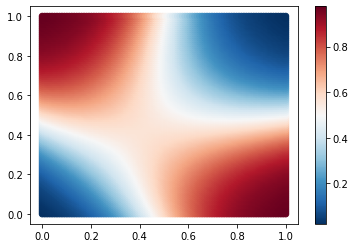

In [81]:
results = np.hstack((x_test,y))
plt.scatter(results[:,0], results[:,1], c=results[:,2], cmap = "RdBu_r");
plt.colorbar();

Here we have plotted the results of our trained neural network applied to the test data. We see in regions near `[0,1]` and `[1,0]`, the color is a gradient of dark to light red, which indicates a prediction close to `1` as expected. Similarly near `[0,0]` and `[1,1]` we see a gradient of dark to light blue, which indicates a prediction close to `0`. These colors define the two classes our inputs are classified into by the model. We can think of the classification boundary then as where color changes between red and blue. Indeed, we see that there are some regions colored in white, which draw a clear boundary between red and blue regions, so it is here that we can plausibly define the decision boundaries. When we observe two decision boundaries, this also confirms that the XOR gate is not a linearly separable problem. 

To explore further, we can observe how these boundaries change by adding more neurons to the hidden layer and training again on the XOR table. Recall that this model has `4` neurons in its hidden layer, so perhaps adding more will result in a more well defined, linear decision boundaries.

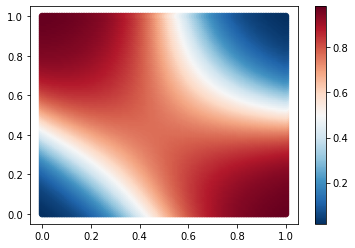

In [84]:
hidden_dim = 250
# Reinitialize weights
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

# Train neural net
W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

# Test model
z,y = predict(x_test, W1_pred, W2_pred)

results = np.hstack((x_test,y))
plt.scatter(results[:,0], results[:,1], c=results[:,2], cmap = "RdBu_r");
plt.colorbar();

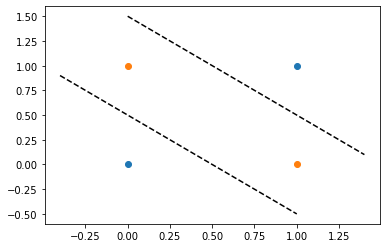

In [134]:
plt.scatter([0,1], [0,1]);
plt.scatter([0,1], [1,0]);
plt.plot(np.linspace(-.4,1), .5 - 1*np.linspace(-.4,1), 'k--');
plt.plot(np.linspace(0,1.4), 1.5 - 1*np.linspace(0,1.4), 'k--');

Since the problem is not linearly separable, there must be two different classifications occuring simultaneously. Any linearly separable problem can be classified with a single perceptron, but XOR requries a hidden layer with two neurons, which indicates that at least two classifications occur.
Each hidden layer neuron dictates a decision boundary.